# The Most Popular Languages Over the past 5 Years.

## Business Understanding
As a software engineer, it is very important to know the job market and the trends. Therefore, in this project, I used the Stack Overflow data from 2016 to 2020 to analyze global developer job market.

* The Most Popular Languages Over the past 5 Years.
* The highest demand job.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def total_count(df, column_1, column_2, rename_column, possible_vals):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    column_1 - the column name you want to look through
    column_2 - the column you want to count values from
    rename_column - the column you want the original column_1 renamed to
    possible_vals - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    df = df[column_1].value_counts().reset_index()
    df.rename(columns={'index': rename_column, column_1: column_2}, inplace=True)
    new_df = defaultdict(int)
    #loop through list of possible values
    for val in possible_vals:
        #loop through rows
        for index in range(df.shape[0]):
            if val in df[rename_column][index]:
                new_df[val] += int(df[column_2][index])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [rename_column, column_2]
    new_df.sort_values('count', ascending=False, inplace=True)
    new_df.set_index(rename_column, inplace=True)
    return new_df


def separate_items(items_list):
    '''Separates the individual items from the list where different
       different items are together'''
    new_list = []
    for language in items_list:
        new_items = language.split(';')
        new_items = map(lambda x: x.strip(), new_items) # remove spaces from individual elements
        new_list.extend(list(new_items))

    return list(set(new_list))

Let's read the data of the stackoverflow from the previous three years

In [7]:
file_name = 'Data/survey_results_public_2016.csv'
df_16 = pd.read_csv(file_name)

file_name = 'Data/survey_results_public_2017.csv'
df_17 = pd.read_csv(file_name)

file_name = 'Data/survey_results_public_2018.csv'
df_18 = pd.read_csv(file_name)

file_name = 'Data/survey_results_public_2019.csv'
df_19 = pd.read_csv(file_name)

file_name = 'Data/survey_results_public_2020.csv'
df_20 = pd.read_csv(file_name)

schema = pd.read_csv('Data/survey_results_schema.csv')


In [24]:
df_16.head()

,Unnamed: 0,collector,country,un_subregion,so_region,age_range,age_midpoint,gender,self_identification,occupation,...,important_sameend,important_newtech,important_buildnew,important_buildexisting,important_promotion,important_companymission,important_wfh,important_ownoffice,developer_challenges,why_stack_overflow
0,1888,Facebook,Afghanistan,Southern Asia,Central Asia,20-24,22.0,Male,Programmer,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4637,Facebook,Afghanistan,Southern Asia,Central Asia,30-34,32.0,Male,Developer; Engineer; Programmer,Mobile developer - iOS,...,This is somewhat important,This is very important,This is very important,I don't care about this,This is somewhat important,This is somewhat important,I don't care about this,I don't care about this,Unrealistic expectations; Interacting with non...,To get help for my job; Because I can't do my ...
2,11164,Facebook,Afghanistan,Southern Asia,Central Asia,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21378,Facebook,Afghanistan,Southern Asia,Central Asia,NaN,NaN,Female,Engineer,DevOps,...,I don't care about this,This is somewhat important,This is very important,This is very important,I don't care about this,I don't care about this,This is very important,This is somewhat important,Corporate policies; Interacting with non-techn...,To get help for my job; Beacause I love to learn
4,30280,Facebook,Afghanistan,Southern Asia,Central Asia,> 60,65.0,Prefer not to disclose,Developer; Engineer; Programmer; Sr. Developer...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Understanding
Let's look at the question related to this:

In [9]:
schema[schema['Column'] == 'LanguageWorkedWith'][schema.columns[-1]].values[0]

'Which of the following programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year?  (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [11]:
df_20['LanguageWorkedWith'].value_counts().reset_index()

,index,LanguageWorkedWith
0,HTML/CSS;JavaScript;PHP;SQL,1073
1,HTML/CSS;JavaScript,900
2,C#;HTML/CSS;JavaScript;SQL,856
3,C#;HTML/CSS;JavaScript;SQL;TypeScript,754
4,HTML/CSS;JavaScript;TypeScript,697
5,Python,651
6,Java,575
7,HTML/CSS;JavaScript;PHP,525
8,C#,416
9,HTML/CSS;Java;JavaScript;SQL,391


This shows that many developers work with more than one language and that the languages should be separated before any analysis

### Data Preparation

Let's separate the languages to get a list of unique individual languages by using `separate_items` function.

In [94]:
languages_list_21 = list(df_20.groupby(['LanguageDesireNextYear']).mean().index)
languages_21 = separate_items(languages_list_21)

languages_list_20 = list(df_20.groupby(['LanguageWorkedWith']).mean().index)
languages_20 = separate_items(languages_list_20)

languages_list_19 = list(df_19.groupby(['LanguageWorkedWith']).mean().index)
languages_19 = separate_items(languages_list_19)

languages_list_18 = list(df_18.groupby(['LanguageWorkedWith']).mean().index)
languages_18 = separate_items(languages_list_18)

languages_list_17 = list(df_17.groupby(['HaveWorkedLanguage']).mean().index)
languages_17 = separate_items(languages_list_17)

languages_list_16 = list(df_16.groupby(['tech_do']).mean().index)
languages_16 = separate_items(languages_list_16)

languages_20[:5]

['R', 'C++', 'Java', 'PHP', 'Objective-C']

Let's build a new dataframe that contains the individual languages and their count by using function `total_count`.

In [95]:
languages_df21 = total_count(df_20, 'LanguageDesireNextYear', 'count', 'Language', languages_21)

languages_df20 = total_count(df_20, 'LanguageWorkedWith', 'count', 'Language', languages_20)

languages_df19 = total_count(df_19, 'LanguageWorkedWith', 'count', 'Language', languages_19)

languages_df18 = total_count(df_18, 'LanguageWorkedWith', 'count', 'Language', languages_18)

languages_df17 = total_count(df_17, 'HaveWorkedLanguage', 'count', 'Language', languages_17)

languages_df16 = total_count(df_16, 'tech_do', 'count', 'Language', languages_17)

In [65]:
languages_df20.head()

,count
Language,
C,46769
Java,45749
JavaScript,38822
HTML/CSS,36181
SQL,31413


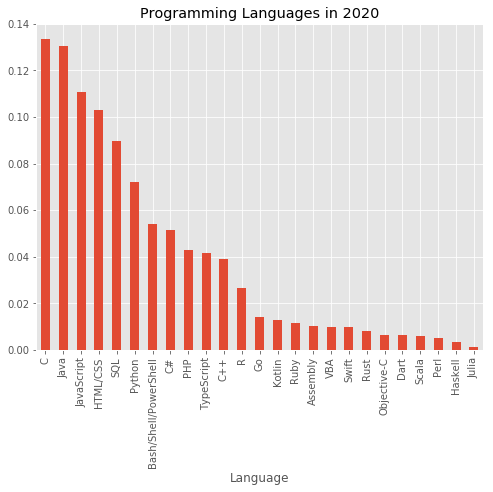

In [38]:
(languages_df20/languages_df20.sum()).plot(kind='bar', legend=None, title='Programming Languages in 2020', figsize=(8,6))

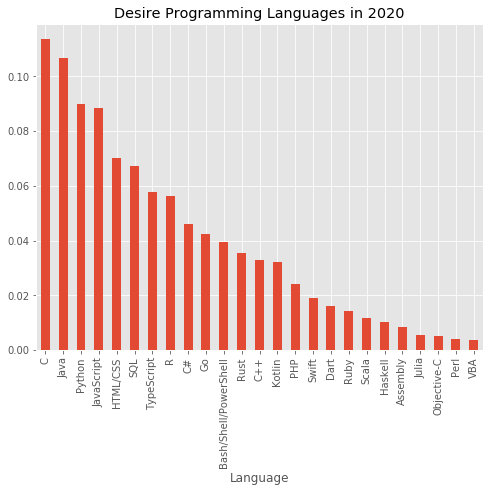

In [66]:
(languages_df21/languages_df21.sum()).plot(kind='bar', legend=None, title='Desire Programming Languages in 2020', figsize=(8,6))

In [96]:
# merge every years (2016 to 2021)
languages_df16_17 = pd.merge(languages_df16, languages_df17, on='Language')
languages_df16_18 = pd.merge(languages_df16_17, languages_df18, on='Language')
languages_df16_19 = pd.merge(languages_df16_18, languages_df19, on='Language')
languages_df16_20 = pd.merge(languages_df16_19, languages_df20, on='Language')
all_languages_df = pd.merge(languages_df16_20, languages_df21, on='Language')
all_languages_df.columns = ['2016','2017', '2018', '2019','2020','Desire 2021']

all_languages_df.head()

,2016,2017,2018,2019,2020,Desire 2021
Language,,,,,,
Java,35603,28149,64912,70113,45749,31671
C,29499,21173,67063,71988,46769,33645
JavaScript,27385,22875,54686,59219,38822,26188
SQL,24248,18754,44670,47544,31413,19970
C#,15283,12476,26954,27097,18041,13674


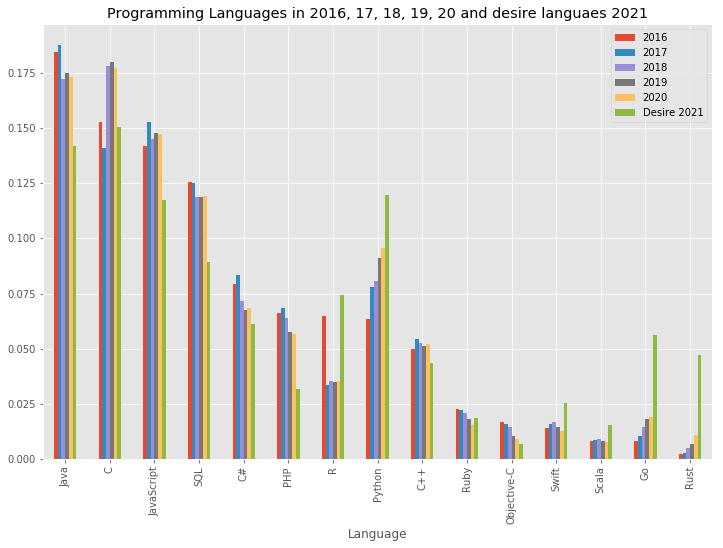

In [70]:
(all_languages_df/all_languages_df.sum()).plot(kind='bar', title='Programming Languages in 2016, 17, 18, 19, 20 and desire languaes 2021', figsize=(12,8))

In [72]:
df_20['DevType'].value_counts().reset_index()

,index,DevType
0,"Developer, full-stack",4424
1,"Developer, back-end",3086
2,"Developer, back-end;Developer, front-end;Devel...",2227
3,"Developer, back-end;Developer, full-stack",1476
4,"Developer, front-end",1401
5,"Developer, mobile",1251
6,"Developer, front-end;Developer, full-stack",830
7,"Developer, back-end;Developer, desktop or ente...",813
8,"Developer, back-end;Developer, desktop or ente...",650
9,"Developer, desktop or enterprise applications",606


In [91]:
job_list_20 = list(df_20.groupby(['DevType']).mean().index)
job_20 = separate_items(job_list_20)

In [92]:
job_df20 = total_count(df_20, 'DevType', 'count', 'Job', job_20)


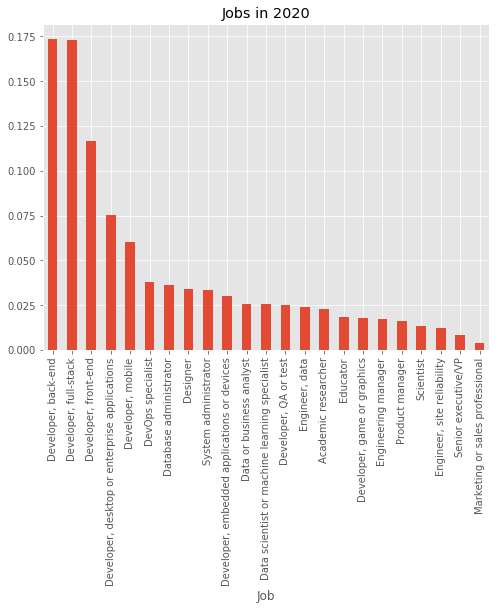

In [93]:
(job_df20/job_df20.sum()).plot(kind='bar', legend=None, title='Jobs in 2020', figsize=(8,6))

### Results Evaluation

Java is the most popular language over the past 5 years. Even though the demand for Java is declining and python is getting more popular. Java, C, JavaScript is the top 3 language in the past 5 years, followed by SQL, the 4th popular one.

On the other hand, Go and Rust are the less popular languages, but many developers desire to learn in the next year(2021).

From the job position point of view, we can see developers with back-end skills have the highest demand, followed by full-stack and front-end developer. As a result, we can predict web service is the most popular business for now and the future. Also, desktop or enterprise applications are critical, as people still prefer using computers over mobile devices for working. However, Mobile devices are getting popular over the past years. So the mobile developer is the 5th popular job. Another trend is Automation, as DevOps specialist and DBA are the 6th and 7th popular jobs.